<a href="https://colab.research.google.com/github/mckennatim/tinyML/blob/main/Copy_of_Mimimizing_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [ ]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  # Here is where you differentiate the model values with respect to the loss function
  dw, db = t.gradient(current_loss, [model.w, model.b])
  # And here is where you update the model values based on the learning rate chosen
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [ ]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.04

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=5.37 b=8.16, loss=235.39824
Epoch  2: w=2.88 b=7.02, loss=89.53321
Epoch  3: w=1.55 b=6.28, loss=44.21074
Epoch  4: w=0.87 b=5.75, loss=29.20066
Epoch  5: w=0.52 b=5.34, loss=23.40557
Epoch  6: w=0.37 b=5.01, loss=20.48158
Epoch  7: w=0.32 b=4.73, loss=18.51543
Epoch  8: w=0.33 b=4.47, loss=16.92490
Epoch  9: w=0.36 b=4.23, loss=15.52804
Epoch 10: w=0.41 b=4.01, loss=14.26370
Epoch 11: w=0.47 b=3.80, loss=13.10749
Epoch 12: w=0.52 b=3.60, loss=12.04655
Epoch 13: w=0.58 b=3.41, loss=11.07196
Epoch 14: w=0.64 b=3.23, loss=10.17635
Epoch 15: w=0.69 b=3.05, loss=9.35323
Epoch 16: w=0.75 b=2.88, loss=8.59670
Epoch 17: w=0.80 b=2.72, loss=7.90137
Epoch 18: w=0.85 b=2.57, loss=7.26228
Epoch 19: w=0.90 b=2.42, loss=6.67488
Epoch 20: w=0.94 b=2.28, loss=6.13499
Epoch 21: w=0.99 b=2.15, loss=5.63877
Epoch 22: w=1.03 b=2.02, loss=5.18269
Epoch 23: w=1.07 b=1.89, loss=4.76349
Epoch 24: w=1.11 b=1.77, loss=4.37821
Epoch 25: w=1.14 b=1.66, loss=4

### Plot our trained values over time

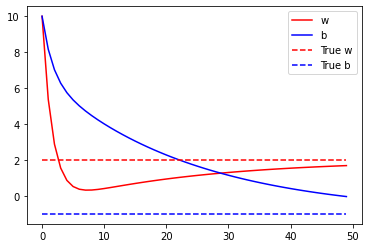

In [ ]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()